In [11]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [3]:
root_dataset_path = "/home/wilk/diabetic_retinopathy/datasets/IDRiD/processed_segmentation_dataset/"

In [4]:
splits = ['train', 'val', 'test']
classes = ['haemorrhages', 'hard_exudates', 'soft_exudates', 'microaneurysms', 'optic_disc']

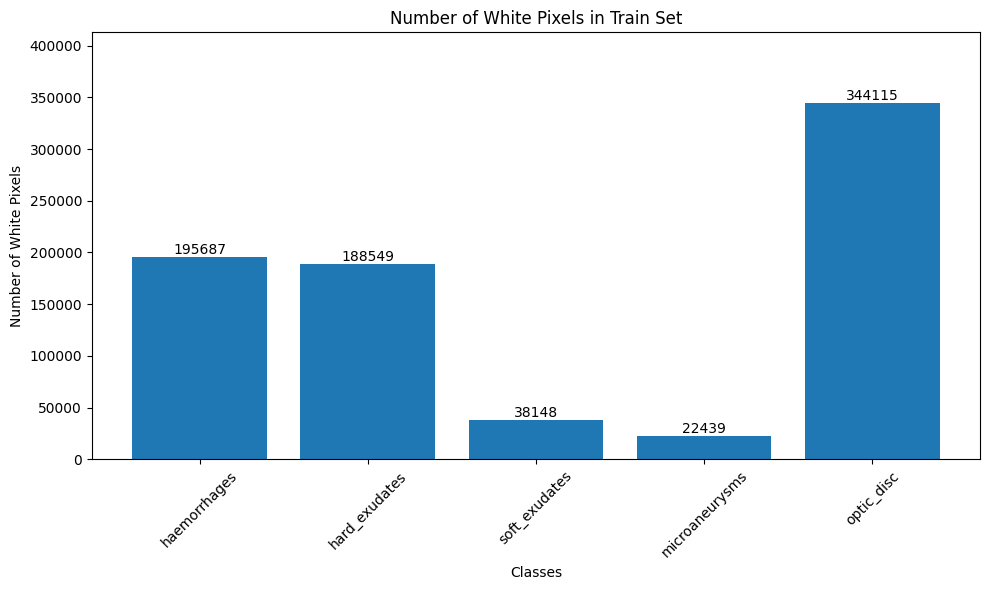

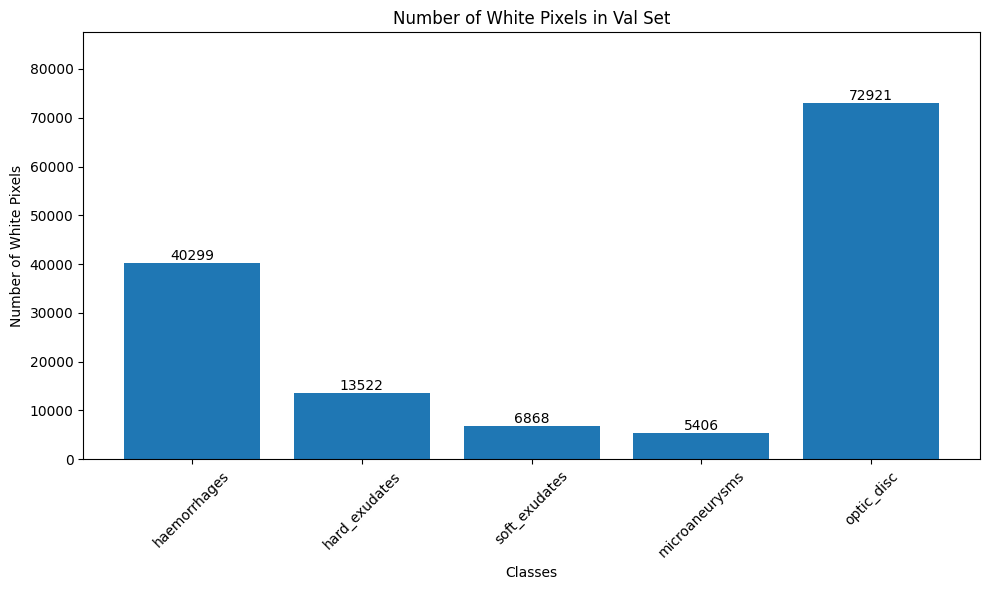

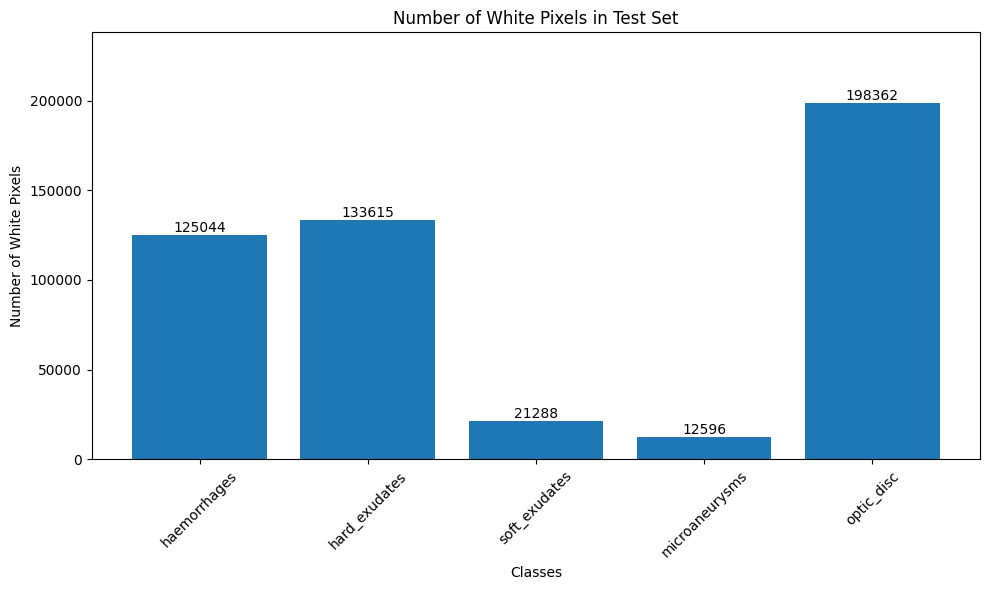

In [15]:
for split in splits:
    num_white_pixels = {}
    for class_name in classes:
        class_dir = os.path.join(root_dataset_path, f"{split}_set", "masks", class_name)
        class_num_white_pixels = 0
        for mask_filename in os.listdir(class_dir):
            mask = plt.imread(os.path.join(class_dir, mask_filename))
            class_num_white_pixels += np.sum(mask > 0)
        num_white_pixels[class_name] = class_num_white_pixels

    plt.figure(figsize=(10, 6))
    bars = plt.bar(num_white_pixels.keys(), num_white_pixels.values())
    plt.title(f'Number of White Pixels in {split.capitalize()} Set')
    plt.xticks(rotation=45)
    plt.ylabel('Number of White Pixels')
    plt.xlabel('Classes')
    plt.ylim(0, max(num_white_pixels.values()) * 1.2)
    for bar, value in zip(bars, num_white_pixels.values()):
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            bar.get_height(),
            f'{value}',
            ha='center',
            va='bottom'
        )
    plt.tight_layout()
    plt.savefig(f'num_white_pixels_{split}.png')
    plt.show()